In [55]:
import pandas as pd
import yaml
import sys
import os
import numpy as np
import torch 
from pathlib import Path
import sys, os
sys.path.insert(0, os.getcwd())
sys.path.append(f'{os.getenv("HOME")}/PLR3/lib')
sys.path.append(f'{os.getenv("HOME")}/PLR3/src')
from helper import compute_auc


obj2_train = '/media/scratch1/jonfrey/models/runs/evaluation/flow-disp/2020-11-14T00:11:36_lr-4/2020-11-14T10:10:15_eval/df/test_df.pkl'
obj2_test = '/media/scratch1/jonfrey/models/runs/evaluation/flow-disp/2020-11-14T00:11:36_lr-4/2020-11-14T10:29:53_eval/df/test_df.pkl'
p = '/media/scratch1/jonfrey/models/evaluate/flow-final-report'


p = '/media/scratch1/jonfrey/models/evaluate/test_dataset'
df_paths = [str(p) for p in Path(p).rglob('*.pkl')]
print(df_paths)                 
df = pd.read_pickle(df_paths[0])

df_tests = []
names= []
for pa in df_paths:
    print(pa)
    df_tests.append( pd.read_pickle(pa) )
    names.append( pa.split('/')[-3])


p = '/media/scratch1/jonfrey/models/evaluate/flow-final-report'
df_paths = [str(p) for p in Path(p).rglob('*.pkl')]
print(df_paths)                 
df = pd.read_pickle(df_paths[0])

df_trains = []
names2= []
for pa in df_paths:
    print(pa)
    
    df_trains.append( pd.read_pickle(pa) )
    names2.append( pa.split('/')[-3])
    
dataset = 'dataset_test'
names, names2


['/media/scratch1/jonfrey/models/evaluate/test_dataset/flow-final-report/2020-11-14T21:32:25_connections_1_1-pyramid-L1/df/test_df.pkl', '/media/scratch1/jonfrey/models/evaluate/test_dataset/flow-final-report/2020-11-14T21:32:26_connections_3_3-pyramid-L1/df/test_df.pkl', '/media/scratch1/jonfrey/models/evaluate/test_dataset/flow-final-report/2020-11-14T21:31:53_connections_3_3-pyramid-L2/df/test_df.pkl', '/media/scratch1/jonfrey/models/evaluate/test_dataset/flow-final-report/2020-11-14T21:31:55_connections_3_3-pyramid-L2/df/test_df.pkl', '/media/scratch1/jonfrey/models/evaluate/test_dataset/flow-final-report/2020-11-14T21:32:26_connections_5_5-pyramid-L1/df/test_df.pkl', '/media/scratch1/jonfrey/models/evaluate/test_dataset/flow-final-report/2020-11-14T21:31:54_connections_1_1-pyramid-L2/df/test_df.pkl', '/media/scratch1/jonfrey/models/evaluate/test_dataset/flow-final-report/2020-11-14T21:31:56_connections_3_3-pyramid-L1/df/test_df.pkl', '/media/scratch1/jonfrey/models/evaluate/test_d

(['2020-11-14T21:32:25_connections_1_1-pyramid-L1',
  '2020-11-14T21:32:26_connections_3_3-pyramid-L1',
  '2020-11-14T21:31:53_connections_3_3-pyramid-L2',
  '2020-11-14T21:31:55_connections_3_3-pyramid-L2',
  '2020-11-14T21:32:26_connections_5_5-pyramid-L1',
  '2020-11-14T21:31:54_connections_1_1-pyramid-L2',
  '2020-11-14T21:31:56_connections_3_3-pyramid-L1',
  '2020-11-14T21:32:26_connections_3_3-pyramid-L2',
  '2020-11-14T21:32:25_connections_5_5-pyramid-L2',
  '2020-11-14T21:32:25_connections_3_3-pyramid-L1'],
 ['2020-11-14T21:32:25_connections_1_1-pyramid-L1',
  '2020-11-14T21:32:26_connections_3_3-pyramid-L1',
  '2020-11-14T21:31:53_connections_3_3-pyramid-L2',
  '2020-11-14T21:31:55_connections_3_3-pyramid-L2',
  '2020-11-14T21:32:26_connections_5_5-pyramid-L1',
  '2020-11-14T21:31:54_connections_1_1-pyramid-L2',
  '2020-11-14T21:31:56_connections_3_3-pyramid-L1',
  '2020-11-14T21:32:26_connections_3_3-pyramid-L2',
  '2020-11-14T21:32:25_connections_5_5-pyramid-L2',
  '2020-11-

In [48]:
df

,init,gt_flow__gt_label,pred_flow__gt_label,pred_flow__flow_mask,pred_flow__pred_label,L1_0,L2_0,L1_1,L2_1,L1_2,L2_2,L1_3,L2_3,L1_4,L2_4,L1_5,L2_5,ID,L1_6,L2_6
0,0.043311,0.002524,0.055465,0.054585,0.038430,16.107079,16.493628,11.136820,11.547665,15.090217,15.496265,13.838602,14.840661,14.017423,14.594838,13.737538,14.231813,2.0,13.776672,14.276590
1,0.060153,0.005394,0.020477,0.025376,999.000000,29.785952,30.700600,17.708733,23.061392,13.127315,13.615253,14.020986,14.791735,13.230288,14.250832,13.497394,14.528316,2.0,13.751234,14.838131
2,0.040287,0.006759,0.083154,0.092661,0.177895,30.810736,36.934391,16.133907,18.429756,14.179753,15.911689,11.440706,12.828378,11.722433,13.186783,11.788399,13.296583,2.0,11.733356,13.262184
3,0.030828,0.007527,0.012653,0.009562,0.024418,10.776016,11.082731,16.461098,17.840115,6.572937,6.588818,5.582880,5.473998,5.349020,5.320482,5.456710,5.425649,2.0,5.496447,5.471149
4,0.028473,0.000956,0.012651,0.009841,0.274830,13.591508,15.603068,23.564934,26.345882,11.726003,11.797457,9.747690,9.756734,10.404613,10.431157,10.046658,10.099944,2.0,10.075696,10.129329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,0.031013,0.001005,0.012742,0.012693,0.029503,16.780432,17.259710,10.104317,10.746562,8.186491,7.985793,7.837559,7.795531,8.773663,8.940354,8.872218,8.987085,2.0,8.874536,8.989528
864,0.034632,0.000561,0.037398,0.038901,0.091829,15.013022,15.547703,19.125977,22.507122,13.747947,14.086190,9.521132,9.754595,9.338641,9.343143,9.267535,9.283861,2.0,9.267550,9.287441
865,0.043735,0.002229,0.055630,0.052652,999.000000,42.232040,49.400406,36.093479,44.179111,18.317797,19.771715,16.949022,17.938744,16.128317,17.091024,15.453588,16.418924,2.0,15.442228,16.413864
866,0.049474,0.006122,0.010563,0.016474,0.037330,14.373836,15.299156,13.179540,14.259460,18.559099,20.505089,17.724230,19.620193,16.973536,18.793264,16.631718,18.487305,2.0,16.482080,18.322107


In [56]:

df.groupby(['ID']).mean()
auc = {}
for df_test, df_train, name in zip(df_tests, df_trains,names):
    test = np.mean( np.array( df_test['L2_6']))
    train = np.mean( np.array( df_train['L2_6']))
    try:
        auc['RUN'].append(name)
        auc['TEST_EPE'].append( test ) 
        auc['TRAIN_EPE'].append( train ) 
        
    except:
        auc['RUN'] =  [name]
        auc['TEST_EPE'] =  [test] 
        auc['TRAIN_EPE'] =  [train] 
        
    for k in df_test.keys():
        if k.find('L1') == -1 and k.find('L2') == -1 and k.find('ID') == -1 and k.find('pred_flow__gt_label') != -1:
            new = 'TEST_AUC'# + k
            test_ar = np.array(df_test[k])
            test_ar = test_ar[test_ar!=999]
            
            train_ar = np.array(df_train[k])
            train_ar = train_ar[train_ar!=999]
            try:     
                auc[ 'TEST_AUC'].append(compute_auc(test_ar ))
                auc[ 'TRAIN_AUC'].append(compute_auc(train_ar ))
            except:
                auc[ 'TEST_AUC'] = [compute_auc(test_ar)]
                auc[ 'TRAIN_AUC'] = [compute_auc(train_ar)]

    
    
df_auc = pd.DataFrame.from_dict(auc)

df_auc

,RUN,TEST_EPE,TRAIN_EPE,TEST_AUC,TRAIN_AUC
0,2020-11-14T21:32:25_connections_1_1-pyramid-L1,13.360655,12.764743,54.095957,60.521749
1,2020-11-14T21:32:26_connections_3_3-pyramid-L1,13.867191,13.879765,50.284139,57.125054
2,2020-11-14T21:31:53_connections_3_3-pyramid-L2,14.052908,13.910454,49.666258,54.869888
3,2020-11-14T21:31:55_connections_3_3-pyramid-L2,12.972867,13.699837,56.482950,57.629464
4,2020-11-14T21:32:26_connections_5_5-pyramid-L1,11.581841,12.240584,64.742343,64.408406
5,2020-11-14T21:31:54_connections_1_1-pyramid-L2,12.173150,11.998860,59.887041,63.545683
6,2020-11-14T21:31:56_connections_3_3-pyramid-L1,13.653638,14.702214,58.356680,57.454393
7,2020-11-14T21:32:26_connections_3_3-pyramid-L2,7.375486,6.847542,78.181888,81.130381
8,2020-11-14T21:32:25_connections_5_5-pyramid-L2,12.256511,13.296067,57.446106,56.168077
9,2020-11-14T21:32:25_connections_3_3-pyramid-L1,7.398411,6.648631,78.684740,81.243107


In [46]:


for df, name in zip(dfs,names):
    info = np.mean( np.array( df['L2_6']))
    try:
        auc['RUN'].append(name)
        
        
        auc['EPE'].append( info ) 
        
    except:
        auc['RUN'] =  [name]
        auc['EPE'] =  [info] 
    for k in df.keys():
        if k.find('L1') == -1 and k.find('L2') == -1 and k.find('ID') == -1 and k.find('pred_flow__gt_label') != -1:
            new = 'TRAIN_AUC'# + k
            ar = np.array(df[k])
            ar = ar[ar!=999]
            try: 
                
                auc[new].append(compute_auc(ar ))
            except:
                auc[new] = [compute_auc(ar)]

    

,RUN,aucinit,aucgt_flow__gt_label,aucpred_flow__gt_label,aucpred_flow__flow_mask,aucpred_flow__pred_label
0,2020-11-14T21:32:25_connections_1_1-pyramid-L1,55.918349,96.202139,60.521749,61.520376,31.587991
1,2020-11-14T21:32:26_connections_3_3-pyramid-L1,56.467702,96.246395,57.125054,57.816642,37.320100
2,2020-11-14T21:31:53_connections_3_3-pyramid-L2,56.467702,96.245833,54.869888,55.276831,41.943501
3,2020-11-14T21:31:55_connections_3_3-pyramid-L2,56.467702,96.244455,57.629464,58.974627,46.829557
4,2020-11-14T21:32:26_connections_5_5-pyramid-L1,56.184293,95.556542,64.408406,64.992452,34.656582
5,2020-11-14T21:31:54_connections_1_1-pyramid-L2,55.918349,96.203339,63.545683,64.631525,35.094677
6,2020-11-14T21:31:56_connections_3_3-pyramid-L1,56.467702,96.242850,57.454393,58.418864,39.926175
7,2020-11-14T21:32:26_connections_3_3-pyramid-L2,81.158540,97.913761,81.130381,81.363996,61.424688
8,2020-11-14T21:32:25_connections_5_5-pyramid-L2,56.184293,95.555798,56.168077,57.028541,25.650292
9,2020-11-14T21:32:25_connections_3_3-pyramid-L1,81.158540,97.912560,81.243107,81.503704,65.955691


Dataframe  2020-11-14T21:32:25_connections_1_1-pyramid-L1
ID
2.0    12.764743
Name: L2_6, dtype: float64
dataset_train-epe-adds-samples( 1367 )-obj( 2 )-perc( 95 ) -meanADD( 0.0358 )-meanL2( 11.5514 )-height-4


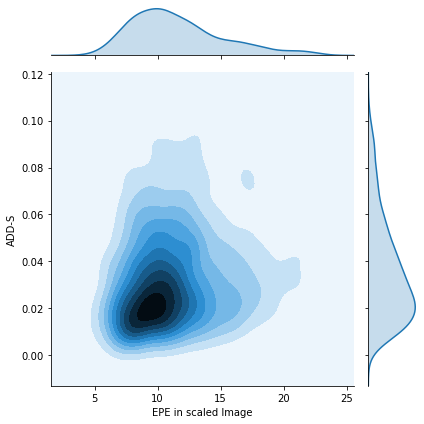

Dataframe  2020-11-14T21:32:26_connections_3_3-pyramid-L1
ID
2.0    13.879765
Name: L2_6, dtype: float64
dataset_train-epe-adds-samples( 1371 )-obj( 2 )-perc( 95 ) -meanADD( 0.0397 )-meanL2( 12.3856 )-height-4


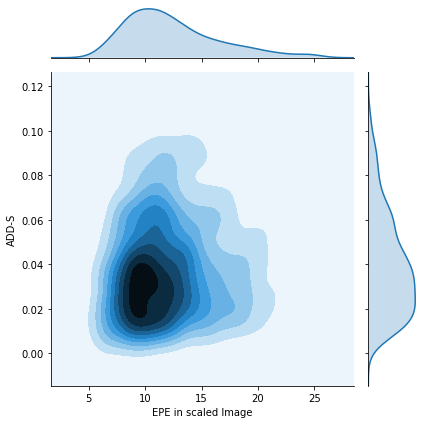

Dataframe  2020-11-14T21:31:53_connections_3_3-pyramid-L2
ID
2.0    13.910454
Name: L2_6, dtype: float64
dataset_train-epe-adds-samples( 1368 )-obj( 2 )-perc( 95 ) -meanADD( 0.0421 )-meanL2( 12.3981 )-height-4


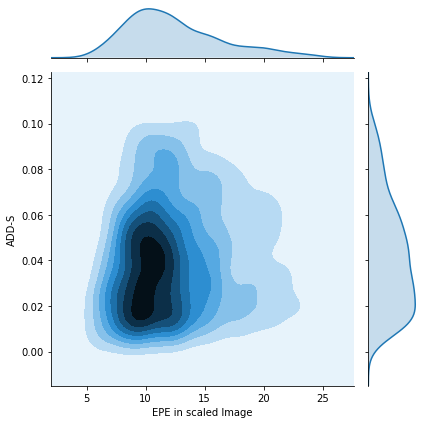

Dataframe  2020-11-14T21:31:55_connections_3_3-pyramid-L2
ID
2.0    13.699837
Name: L2_6, dtype: float64
dataset_train-epe-adds-samples( 1363 )-obj( 2 )-perc( 95 ) -meanADD( 0.0387 )-meanL2( 12.2601 )-height-4


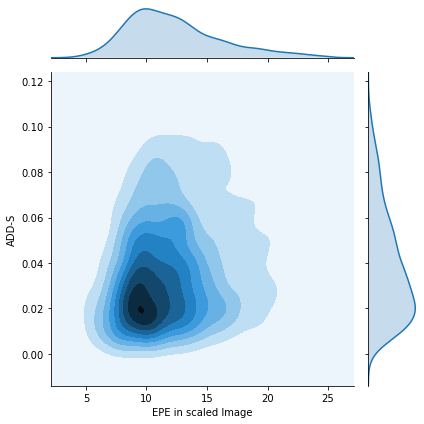

Dataframe  2020-11-14T21:32:26_connections_5_5-pyramid-L1
ID
2.0    12.240584
Name: L2_6, dtype: float64
dataset_train-epe-adds-samples( 1361 )-obj( 2 )-perc( 95 ) -meanADD( 0.0316 )-meanL2( 11.0059 )-height-4


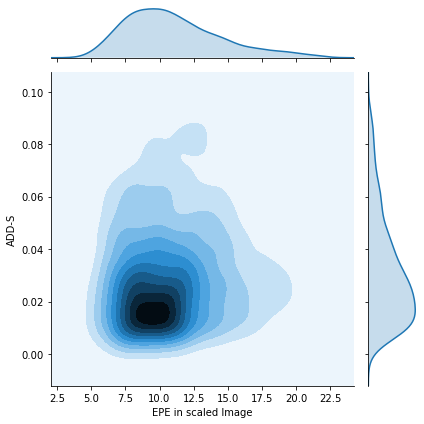

Dataframe  2020-11-14T21:31:54_connections_1_1-pyramid-L2
ID
2.0    11.99886
Name: L2_6, dtype: float64
dataset_train-epe-adds-samples( 1364 )-obj( 2 )-perc( 95 ) -meanADD( 0.0324 )-meanL2( 10.7572 )-height-4


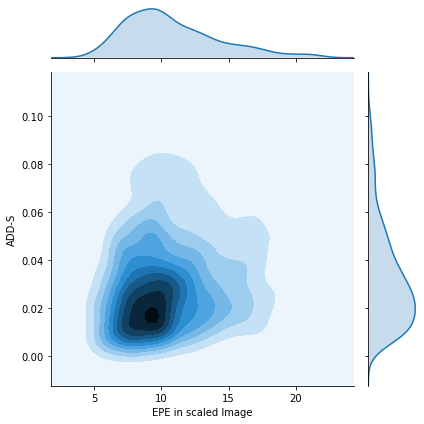

Dataframe  2020-11-14T21:31:56_connections_3_3-pyramid-L1
ID
2.0    14.702214
Name: L2_6, dtype: float64
dataset_train-epe-adds-samples( 1367 )-obj( 2 )-perc( 95 ) -meanADD( 0.0389 )-meanL2( 12.9578 )-height-4


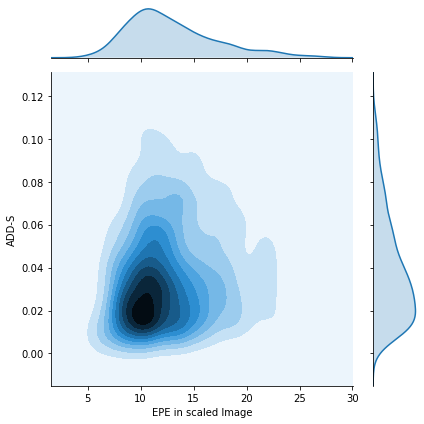

Dataframe  2020-11-14T21:32:26_connections_3_3-pyramid-L2
ID
2.0    6.847542
Name: L2_6, dtype: float64
dataset_train-epe-adds-samples( 1363 )-obj( 2 )-perc( 95 ) -meanADD( 0.0162 )-meanL2( 6.3947 )-height-4


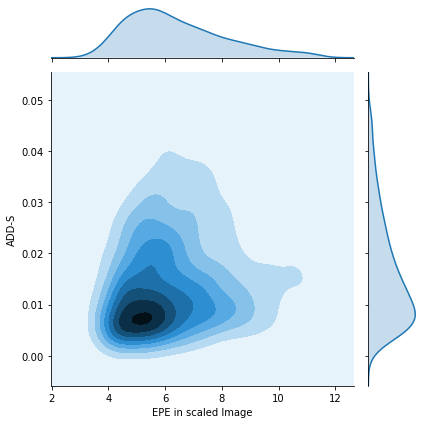

Dataframe  2020-11-14T21:32:25_connections_5_5-pyramid-L2
ID
2.0    13.296067
Name: L2_6, dtype: float64
dataset_train-epe-adds-samples( 1356 )-obj( 2 )-perc( 95 ) -meanADD( 0.0403 )-meanL2( 12.088 )-height-4


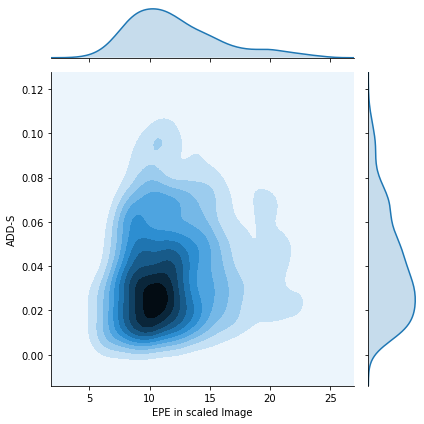

Dataframe  2020-11-14T21:32:25_connections_3_3-pyramid-L1
ID
2.0    6.648631
Name: L2_6, dtype: float64
dataset_train-epe-adds-samples( 1361 )-obj( 2 )-perc( 95 ) -meanADD( 0.016 )-meanL2( 6.2011 )-height-4


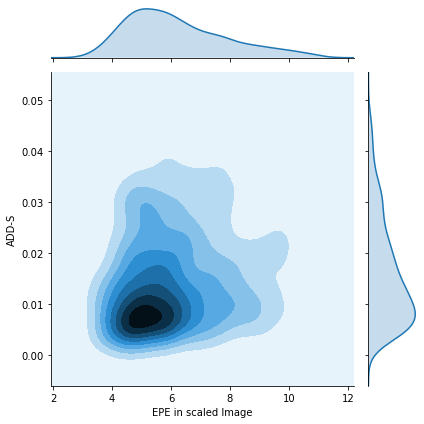

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

for df, name in zip(dfs,names):
    print('Dataframe ', name)
    print( df.groupby(['ID']).mean()['L2_6'] )
    
    
    adds = np.array( df['pred_flow__gt_label'] )
    l2 = np.array( df['L2_6'] )


    m = adds != 999
    adds = adds[m]
    l2 = l2[m]

    v_adds = np.percentile(adds, 95, axis=0)
    v_l2 = np.percentile(l2, 95, axis=0)

    m1 = adds < v_adds
    m2 = l2 < v_l2
    m3 = m1 * m2

    samples = int(np.sum(m3))
    obj = int( df['ID'][0] )
    per = 95


    sns.jointplot(l2[m3], adds[m3], kind = 'kde')#,height=4)
    plt.gcf().axes[0].set_xlabel('EPE in scaled Image')
    plt.gcf().axes[0].set_ylabel('ADD-S')
    plt.tight_layout()

    ma = round( np.mean( adds[m3] ), 4)
    ml2 = round(np.mean( l2[m3] ), 4)
    print(f'{dataset}-epe-adds-samples( {samples} )-obj( {obj} )-perc( {per} ) -meanADD( {ma} )-meanL2( {ml2} )-height-4')
    #plt.savefig(f"/home/jonfrey/submisson/{dataset}-epe-adds-samples( {samples} )-obj( {obj} )-perc( {per} ) -meanADD( {ma} )-meanL2( {ml2} ).png",dpi=600)
    plt.show()


    # sns.jointplot(l2[m3], adds[m3], kind = 'kde')#,height=4)
    # plt.gcf().axes[0].set_xlabel('EPE in scaled Image')
    # plt.gcf().axes[0].set_ylabel('ADD-S')
    # plt.tight_layout()
    # #plt.savefig(f"/home/jonfrey/submisson/{dataset}-epe-adds-samples( {samples} )-obj( {obj} )-perc( {per} ) -meanADD( {ma} )-meanL2( {ml2} )-height-4.png",dpi=600)
    # plt.show()